**San Jose State University**\
**Department of Electrical Engineering**\
**Course: Machine Learning**\
**Submitted By:** Jaykumar Darji - 018180851 & Jainil Rao - 018236582

In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Get all file paths and print
file_paths = glob.glob(os.path.join('/Users/spartan/Desktop/MLproject/har70plus', '*'))
file_paths

['/Users/spartan/Desktop/MLproject/har70plus/518.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/508.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/509.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/507.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/513.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/512.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/506.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/510.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/504.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/505.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/511.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/515.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/501.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/514.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/502.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/516.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/517.csv',
 '/Users/spartan/Desktop/MLproject/har70plus/503.csv']

In [3]:
#Store all the data in a dictionary format and print the size of each recording.
Data_dict = {}
for i,path in enumerate(file_paths):
    df = pd.read_csv(path)
    Data_dict[path.split('/')[-1].split('.')[0]] = df
    print(path.split('/')[-1].split('.')[0],df.shape)

518 (141714, 8)
508 (130494, 8)
509 (121763, 8)
507 (120125, 8)
513 (123599, 8)
512 (119310, 8)
506 (122714, 8)
510 (122061, 8)
504 (150758, 8)
505 (87006, 8)
511 (128063, 8)
515 (153517, 8)
501 (103860, 8)
514 (101510, 8)
502 (131367, 8)
516 (138278, 8)
517 (147045, 8)
503 (116413, 8)


In [4]:
#print first five lines from one of the data recording.
df.head()

timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2021-03-29 14:42:07.460 -0.971680 -0.072266 -0.175781 -1.712158 -0.120117   
1  2021-03-29 14:42:07.480 -1.364746  0.182861 -0.377197 -1.580322 -0.170166   
2  2021-03-29 14:42:07.500 -1.249512  0.182129 -0.466553 -1.052734 -0.261719   
3  2021-03-29 14:42:07.520 -0.841553 -0.026855 -0.445557 -0.863281 -0.132568   
4  2021-03-29 14:42:07.539 -0.669189 -0.068115 -0.380371 -0.720215 -0.083496   

    thigh_z  label  
0  1.502686      6  
1 -0.145508      6  
2 -0.783691      6  
3 -0.416992      6  
4 -0.291504      6

In [5]:
#print data description (summary stats)
df.describe()

back_x         back_y         back_z        thigh_x  \
count  116413.000000  116413.000000  116413.000000  116413.000000   
mean       -0.848626      -0.066992      -0.120165      -0.667310   
std         0.256388       0.104845       0.497338       0.624197   
min        -2.026123      -0.796875      -1.878662      -5.297607   
25%        -0.978516      -0.109375      -0.423096      -0.982910   
50%        -0.921875      -0.078125      -0.336914      -0.911621   
75%        -0.776123      -0.031250       0.312500       0.000000   
max        -0.184082       1.207031       0.941406       2.316895   

             thigh_y        thigh_z          label  
count  116413.000000  116413.000000  116413.000000  
mean       -0.069913      -0.456624       3.917672  
std         0.411321       0.527823       2.942509  
min        -3.303467      -4.245605       1.000000  
25%        -0.159424      -1.029785       1.000000  
50%        -0.062988      -0.274658       3.000000  
75%         0.000000      -0.048096       7.000000  
max         5.725098       2.079834       8.000000

In [6]:
# Collect the null counts into a DataFrame
null_counts = pd.DataFrame({k: v.isnull().sum() for k, v in Data_dict.items()})
null_counts = null_counts.T #(Transpose)

null_counts.reset_index(inplace=True)
null_counts.columns = ['Filename'] + list(null_counts.columns[1:])

row_blocks = [null_counts.iloc[i::1] for i in range(1)]

#Print the null counts in each feature 
for block in row_blocks:
    print(block.to_string(index=False))
    print()  # Add spacing between blocks

Filename  timestamp  back_x  back_y  back_z  thigh_x  thigh_y  thigh_z  label
     518          0       0       0       0        0        0        0      0
     508          0       0       0       0        0        0        0      0
     509          0       0       0       0        0        0        0      0
     507          0       0       0       0        0        0        0      0
     513          0       0       0       0        0        0        0      0
     512          0       0       0       0        0        0        0      0
     506          0       0       0       0        0        0        0      0
     510          0       0       0       0        0        0        0      0
     504          0       0       0       0        0        0        0      0
     505          0       0       0       0        0        0        0      0
     511          0       0       0       0        0        0        0      0
     515          0       0       0       0        0        0   

In [7]:
#Again prints the null data count in complete dataset
df_keys = list(Data_dict.keys())
combined_data = Data_dict[df_keys[0]]
for key in df_keys[1:]:
    combined_data = pd.concat([combined_data,Data_dict[key]],axis=0)
combined_data.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [8]:
print("Shape of the dataset is: " + str(combined_data.shape[0]))

Shape of the dataset is: 2259597


In [9]:
#check if the dataset has any duplicate entries, if there is then drop them.
print("Dataset have total " + str(combined_data.duplicated().sum()) + " Duplicate data points")
# combined_data = combined_data.drop_duplicates()

Dataset have total 0 Duplicate data points


In [10]:
#final data
combined_data

timestamp    back_x    back_y    back_z   thigh_x  \
0       2021-06-11 10:24:37.958 -0.978027 -0.223633  0.049561 -0.992676   
1       2021-06-11 10:24:37.979 -0.975830 -0.223633  0.065430 -1.003906   
2       2021-06-11 10:24:37.999 -0.975830 -0.223633  0.057373 -1.008545   
3       2021-06-11 10:24:38.019 -0.976318 -0.222900  0.042969 -0.994141   
4       2021-06-11 10:24:38.039 -0.972656 -0.226807  0.049561 -0.996338   
...                         ...       ...       ...       ...       ...   
116408  2021-03-29 15:23:45.939 -0.980957 -0.091797 -0.376221 -0.942139   
116409  2021-03-29 15:23:45.959 -0.917969 -0.073486 -0.334717 -0.894287   
116410  2021-03-29 15:23:45.979 -0.839355 -0.062744 -0.325928 -0.830566   
116411  2021-03-29 15:23:46.000 -0.774414 -0.046875 -0.323486 -0.784912   
116412  2021-03-29 15:23:46.020 -0.760498 -0.066162 -0.345947 -0.768555   

         thigh_y   thigh_z  label  
0       0.125000 -0.152100      6  
1       0.125000 -0.152100      6  
2       0.123535 -0.150635      6  
3       0.133057 -0.158691      6  
4       0.135986 -0.170166      6  
...          ...       ...    ...  
116408  0.013916 -0.031982      6  
116409 -0.002930  0.039062      6  
116410 -0.021240  0.027344      6  
116411 -0.054932 -0.010742      6  
116412 -0.088623 -0.056641      6  

[2259597 rows x 8 columns]

In [11]:
#creat pie chart of the label distribution (%)
labels_dic = {
    1: 'walking', 3: "shiuffling", 4: "stairs (asc)",
    5: "stairs (desc)", 6: "standing", 7: "sitting", 8: "lying"
}

labels = list(labels_dic.values())
counts = [len(combined_data[combined_data['label'] == k]) for k in labels_dic]

fig = go.Figure(
    data=[go.Pie(labels=labels, values=counts, hoverinfo='label+percent',
                 textinfo='percent', textfont_size=12)],
    layout=go.Layout(
        title=dict(text='Label Distribution (%)', x=0.45),  # Center title
        height=600,
        width=800
    )
)

fig.show()



##### Severe Class Imbalance:
* Walking is nearly 50% of the dataset.
* Stairs activities are < 0.3% — they are highly underrepresented.
* Models trained directly on this will likely bias heavily toward walking and ignore stairs completely.

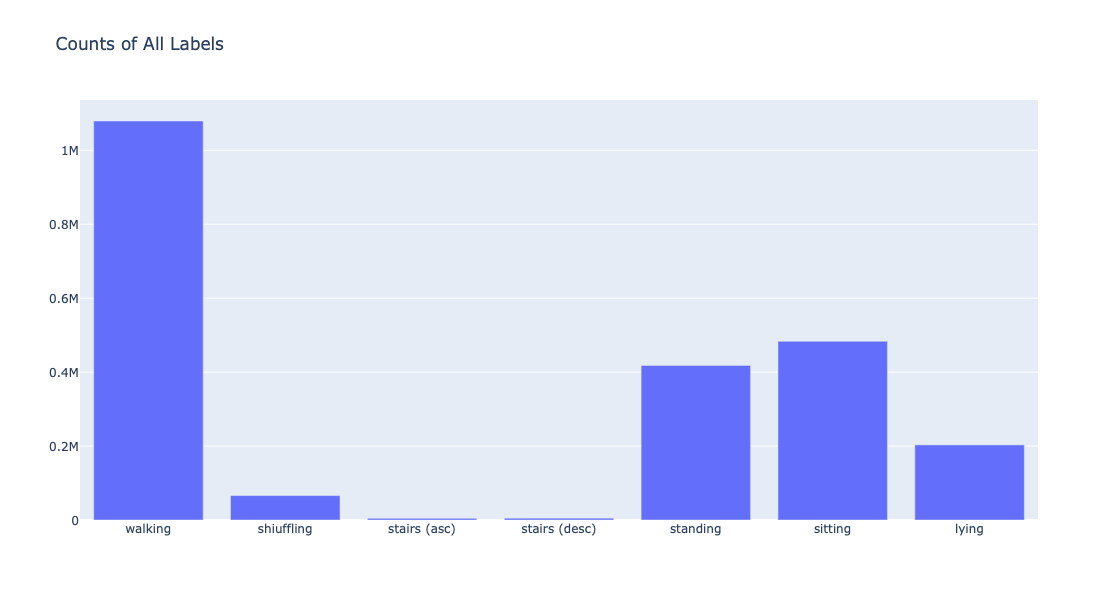

In [12]:
#create the bar chart of label distribution (Count)
fig = go.Figure(data=[go.Bar(x=labels, y=counts)],
                layout=go.Layout(title='Counts of All Labels', height=600))
fig.show()

Severe Class Imbalance:
* Heavily biased toward walking, followed by sitting and standing.
* Minority classes like stairs (asc/desc) will have almost no learning signal unless you resample or weight classes.

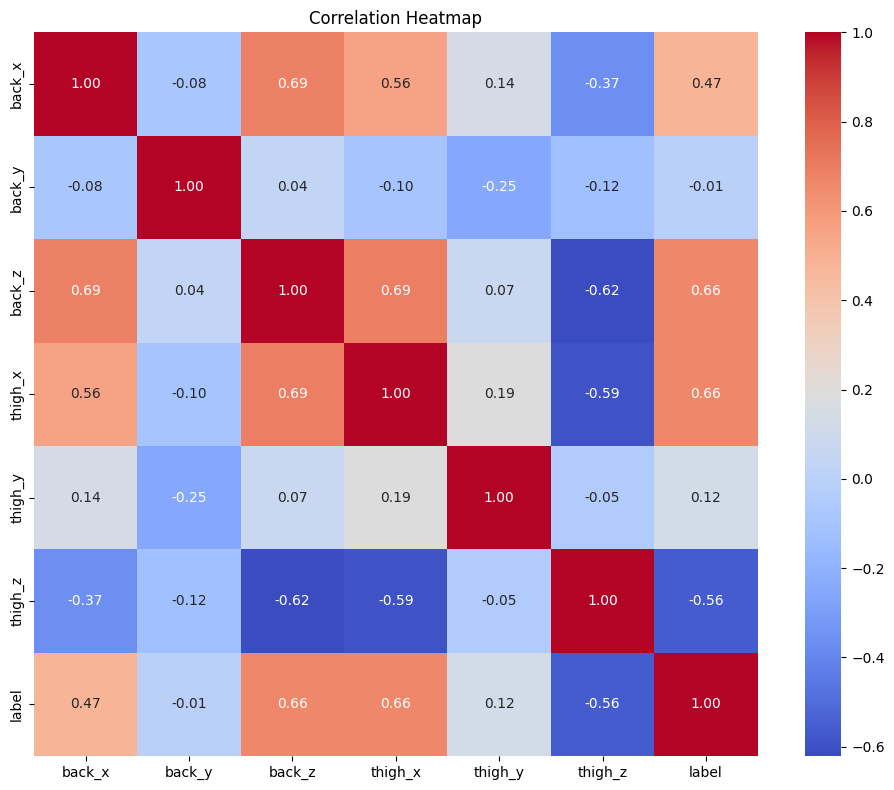

In [13]:
# Drop non-numeric or date/time columns
numeric_data = combined_data.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_data.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.savefig("Corr.png")
plt.tight_layout()
plt.show()

Observations:
* back_z (Correlation: +0.66 with label):
This feature shows a strong positive correlation with the activity label. It likely captures meaningful motion or posture patterns.
* thigh_x (Correlation: +0.66 with label):
Another feature with equally strong correlation, which suggests that horizontal thigh movement is highly indicative of specific activities.
* back_x (Correlation: +0.47 with label):
This has a moderate positive correlation, which means it’s likely contributing useful information.
* thigh_z (Correlation: -0.56 with label):
Despite being negatively correlated, the strength of this correlation suggests it still carries significant predictive power..
* thigh_y (Correlation: +0.12 with label):
This is only weakly correlated, hinting at limited predictive value.
* back_y (Correlation: -0.01 with label):
This feature appears to be completely uncorrelated with the target.

Since back_z and thigh_x are highly correlated with each other too (+0.69), I’ll be careful of multicollinearity, especially if I use linear models.

In [14]:
from scipy.stats import zscore
outliers = combined_data[np.abs(zscore(combined_data['thigh_y'])) > 3]

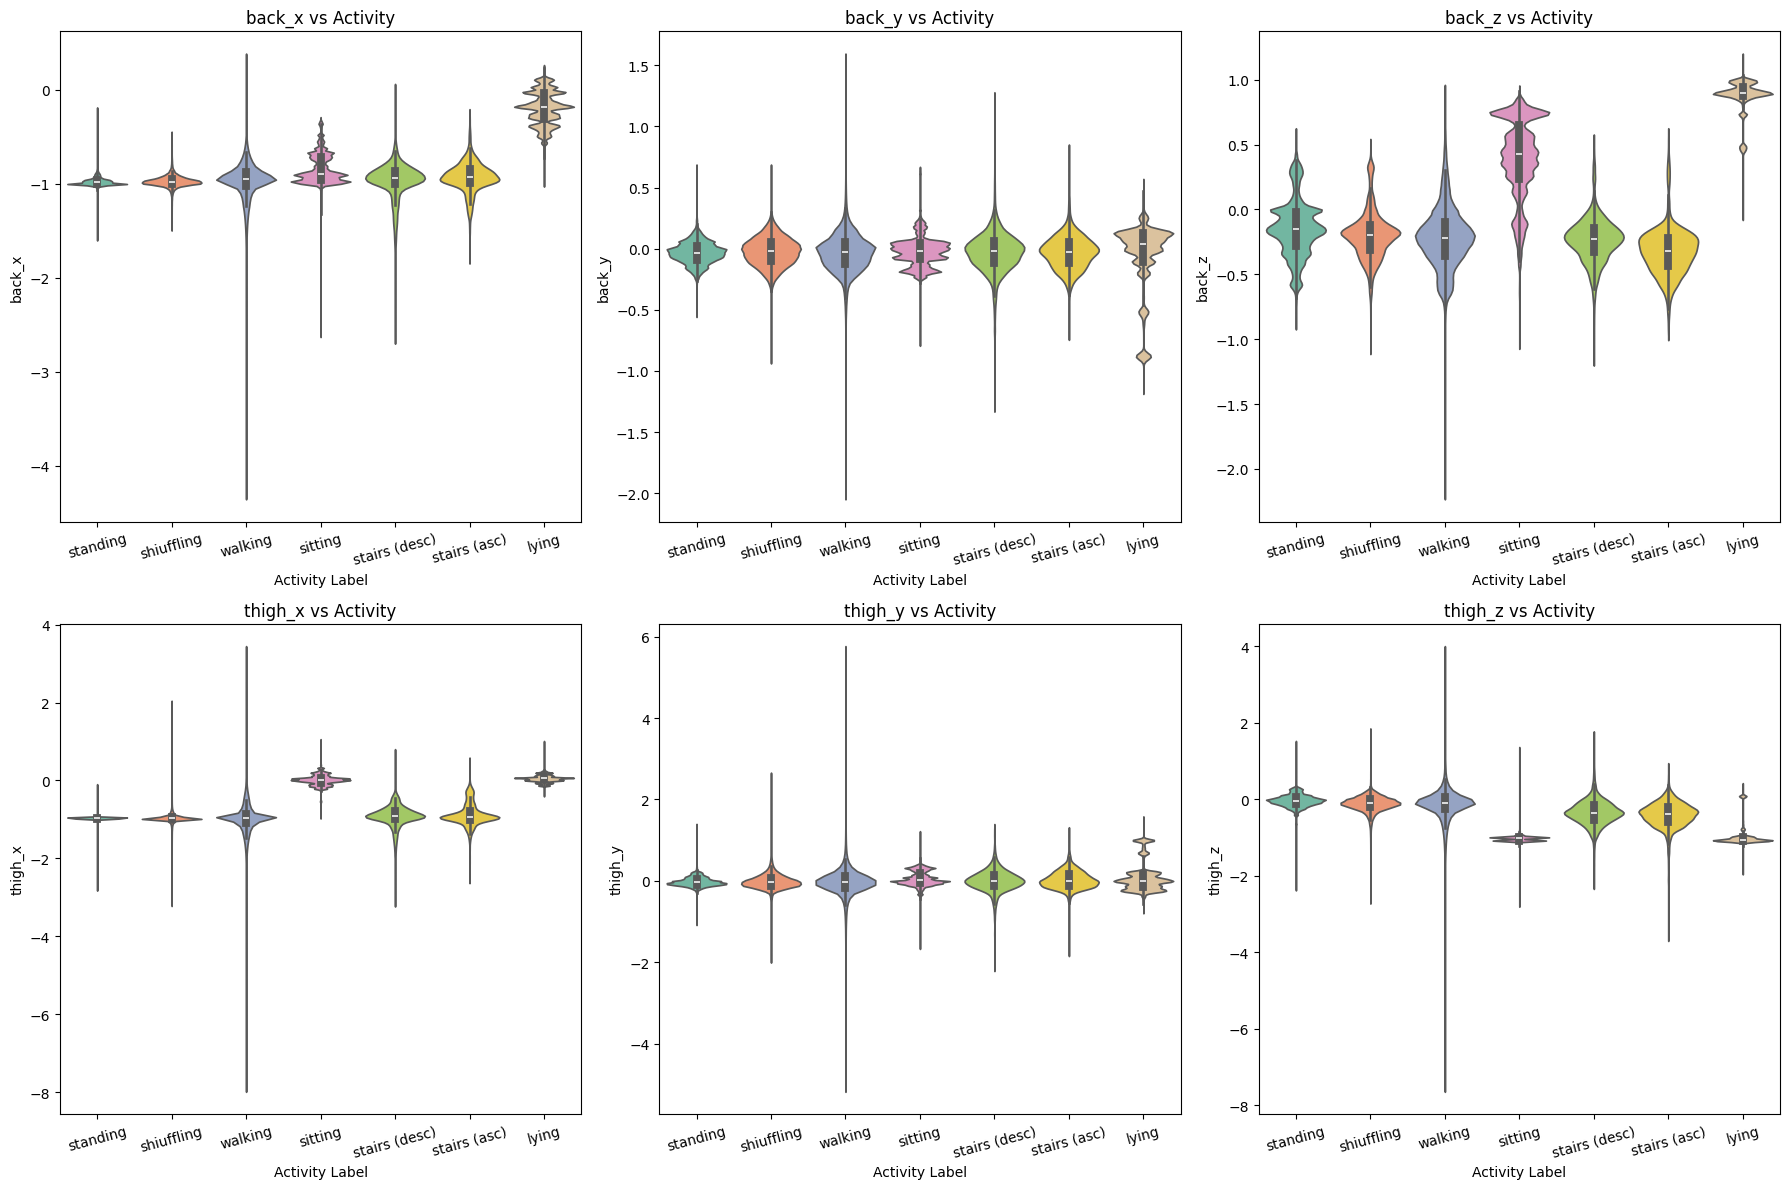

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

combined_data['activity'] = combined_data['label'].map(labels_dic)

# Assuming your DataFrame is named df
combined_data['label'] = combined_data['label'].astype(str)  # Convert labels to string for categorical plotting

# Sensor columns (excluding timestamp and label)
sensor_cols = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

plt.figure(figsize=(18, 12))
for i, col in enumerate(sensor_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='activity', y=col, data=combined_data, inner='box', palette='Set2')
    plt.title(f'{col} vs Activity')
    plt.xlabel('Activity Label')
    plt.ylabel(col)
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

Insights:
* Dynamic activities (like walking, stairs) result in greater spread and higher variance in accelerometer data.
* Static activities (like sitting, standing, lying) tend to have lower variability and more tightly clustered values.
* walking shows the most distinct pattern across all axes and sensors—potentially very distinguishable.
* lying shows clear separation in back_x and back_z — these features may be good for detecting rest/sleep.
* thigh sensor data shows more pronounced changes with movement-heavy activities, making it useful for detecting transitions and dynamic tasks.

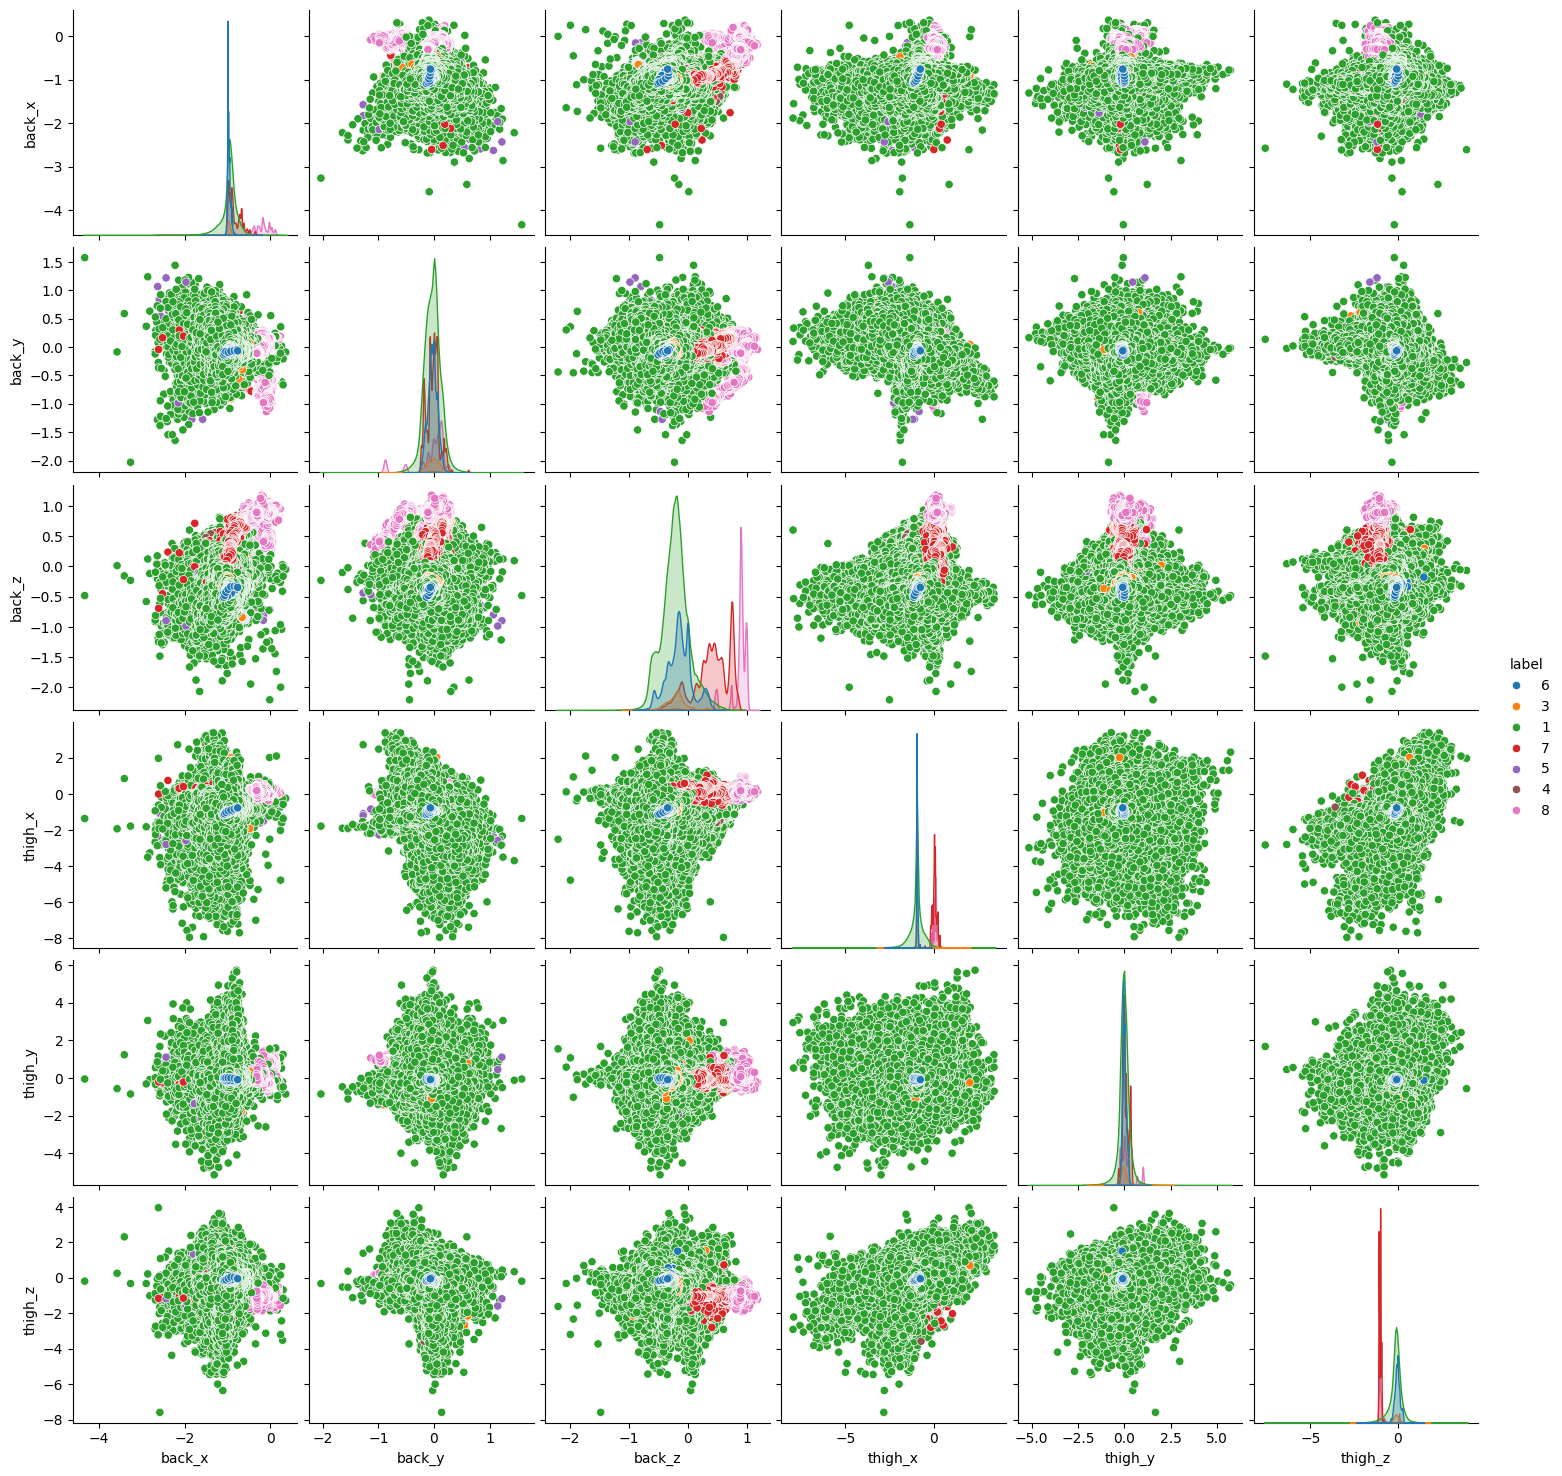

In [16]:
sns.pairplot(combined_data[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']],
             hue='label')
plt.show()

Observations:
- Each diagonal plot shows the distribution (KDE/bell curve) of one sensor axis.
- Each off-diagonal cell shows scatter plots between two features, colored by activity labels.

1. Walking (Green, Label 1)
- Extremely dominant in the dataset.
- Green cloud covers most of the plot space across all feature pairs.
- Wide spread: walking behavior varies a lot in sensor readings.
- It overlaps with almost all other activities, making it the hardest to separate without temporal features.

2. Standing (Blue, Label 6)
- Forms a tight cluster at the center (around thigh_x, back_z, etc.).
- Very low spread compared to walking.
- Sometimes gets overlapped by slow walking or standing-swaying behavior.

3. Shuffling (Orange, Label 3)
- Scattered points around the walking cloud.
- Hard to differentiate from walking directly based only on static features.
- Probably requires movement speed, gait patterns, or step frequency to separate cleanly.

4. Sitting (Red, Label 7)
- Forms a distinct lower spread along thigh_z and thigh_x axes.
- Shows separation from standing if you consider thigh_z more carefully.
- Needs fine-grained thresholding to avoid misclassifying some sitting as standing.

5. Stairs Ascending/Descending (Brown & Purple, Labels 4 & 5)
- Mixed inside walking cloud.
- No clear separation from normal walking on static features alone.
- Likely needs dynamic features.

6. Lying (Pink, Label 8)
- Most distinct among all activities!
- Forms a low, separated cloud.
- Easily classifiable compared to standing, walking, stairs.

7. Diagonal Bell Curves
- Walking (green) dominates every diagonal bell-curve.
- Other activities like lying and sitting show small separate bumps.
- walking heavily skews the data distribution — models might initially be biased toward predicting walking.

In [17]:
numeric_data.corr()


back_x    back_y    back_z   thigh_x   thigh_y   thigh_z     label
back_x   1.000000 -0.076969  0.689454  0.555857  0.138549 -0.367425  0.474500
back_y  -0.076969  1.000000  0.042887 -0.101831 -0.250837 -0.122932 -0.005157
back_z   0.689454  0.042887  1.000000  0.693481  0.072423 -0.621126  0.662470
thigh_x  0.555857 -0.101831  0.693481  1.000000  0.193223 -0.593122  0.660149
thigh_y  0.138549 -0.250837  0.072423  0.193223  1.000000 -0.045061  0.121512
thigh_z -0.367425 -0.122932 -0.621126 -0.593122 -0.045061  1.000000 -0.563780
label    0.474500 -0.005157  0.662470  0.660149  0.121512 -0.563780  1.000000